<a href="https://colab.research.google.com/github/mailaucq/Data-Science1/blob/master/Notas_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Escalas

Hay cuatro tipos de escalas:


1.   Ratio scale: las unidades estan igualmente espaciadas, las operaciones matematicas son validas, e.g height and weight
2.   Interval scale: igualmente espaciadas, 
3.   Ordinal scale: el orden es importante pero no estan igualmente espaciadas
4.   Nominal scale: datos categoricos sin algun orden



In [0]:
import pandas as pd

##Manejar escala nominal con dataframes.

In [0]:
df = pd.DataFrame(["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D"], index= ["excelent", "excelent", "excelent", "good", "good", "good", "ok", "ok", "ok", "poor", "poor"])

In [3]:
df.rename(columns={0: "Grades"}, inplace=True)
df

,Grades
excelent,A+
excelent,A
excelent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [4]:
df["Grades"].astype("category").head()

excelent    A+
excelent     A
excelent    A-
good        B+
good         B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [5]:
grades = df["Grades"].astype("category", categories= ["D", "D+", "C-", "C", "C+", "B-", "B", "B+", "A-", "A", "A+"], ordered=True)
grades.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  """Entry point for launching an IPython kernel.


excelent    A+
excelent     A
excelent    A-
good        B+
good         B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [6]:
grades > 'C'

excelent     True
excelent     True
excelent     True
good         True
good         True
good         True
ok           True
ok          False
ok          False
poor        False
poor        False
Name: Grades, dtype: bool

In [12]:
s = pd.Series(['Low', 'Low', 'High', 'Medium', 'Low', 'High', 'Low'])
s.astype('category', categories=['Low', 'Medium', 'High'], ordered=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


0       Low
1       Low
2      High
3    Medium
4       Low
5      High
6       Low
dtype: category
Categories (3, object): [Low < Medium < High]

## Dividir los datos en bins

In [13]:
s = pd.Series([168, 180, 174, 190, 170, 185, 179, 181, 175, 169, 182, 177, 180, 171])


pd.cut(s, 3)

# You can also add labels for the sizes [Small < Medium < Large].
pd.cut(s, 3, labels=['Small', 'Medium', 'Large'])

0      Small
1     Medium
2      Small
3      Large
4      Small
5      Large
6     Medium
7     Medium
8      Small
9      Small
10    Medium
11    Medium
12    Medium
13     Small
dtype: category
Categories (3, object): [Small < Medium < Large]

# Pivot table
Resume los datos en un dataframe dado una propuesta en particular.

In [19]:
s = pd.Series([2012,2012,2012,2013,2013,2013])
s2 = pd.Series(["MITSUBISHI","MITSUBISHI", "NISSAN", "FORD", "MITSUBISHI", "NISSAN"])
s3 = pd.Series([49, 61, 80,107, 69, 80])
df = pd.DataFrame(data={"YEAR": s, "Make":s2, "(kW)":s3})
df.head()

,(kW),Make,YEAR
0,49,MITSUBISHI,2012
1,61,MITSUBISHI,2012
2,80,NISSAN,2012
3,107,FORD,2013
4,69,MITSUBISHI,2013


In [0]:
import numpy as np

In [20]:
df.pivot_table(values="(kW)", index="YEAR", columns="Make", aggfunc=np.mean)

Make,FORD,MITSUBISHI,NISSAN
YEAR,,,
2012,NaN,55.0,80.0
2013,107.0,69.0,80.0


In [22]:
df.pivot_table(values="(kW)", index="YEAR", columns="Make", aggfunc=[np.mean, np.max], margins=True)

mean                                amax                       
Make   FORD MITSUBISHI NISSAN        All   FORD MITSUBISHI NISSAN  All
YEAR                                                                  
2012    NaN  55.000000   80.0  63.333333    NaN       61.0   80.0   80
2013  107.0  69.000000   80.0  85.333333  107.0       69.0   80.0  107
All   107.0  59.666667   80.0  74.333333  107.0       69.0   80.0  107

#Date functionality

In [0]:
import pandas as pd
import numpy as np

## Timestamp

In [24]:
pd.Timestamp("9/1/2016 10:05AM")

Timestamp('2016-09-01 10:05:00')

##Period

In [25]:
pd.Period("1/2016")

Period('2016-01', 'M')

In [26]:
pd.Period("3/5/2016")

Period('2016-03-05', 'D')

##DatetimeIndex

In [29]:
t1 = pd.Series(list("abc"), [pd.Timestamp("2016-09-01"), pd.Timestamp("2016-09-02"), pd.Timestamp("2017-09-03")])
t1

2016-09-01    a
2016-09-02    b
2017-09-03    c
dtype: object

In [30]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

##PeriodIndex

In [31]:
t2 = pd.Series(list("def"), [pd.Period("2016-09"), pd.Period("2016-10"), pd.Period("2016-11")])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [32]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

##Converting to Datetime

In [33]:
d1 = ["2 June 2013", "Aug 29, 2014", "2015-06-26", "7/12/16"]
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list("ab"))
ts3

,a,b
2 June 2013,89,77
"Aug 29, 2014",64,55
2015-06-26,94,66
7/12/16,12,96


In [34]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,89,77
2014-08-29,64,55
2015-06-26,94,66
2016-07-12,12,96


In [35]:
pd.to_datetime("4.7.12", dayfirst=True)

Timestamp('2012-07-04 00:00:00')

##Timedeltas

In [38]:
pd.Timestamp("9/3/2016") - pd.Timestamp("9/1/2016")

Timedelta('2 days 00:00:00')

In [37]:
pd.Timestamp("9/2/2016 8:10AM") + pd.Timedelta("12D 3H")

Timestamp('2016-09-14 11:10:00')

##Working with Dates in a DataFrame

In [45]:
dates = pd.date_range("03-04-2019", periods = 9, freq = "2W-SUN")
dates

DatetimeIndex(['2019-03-10', '2019-03-24', '2019-04-07', '2019-04-21',
               '2019-05-05', '2019-05-19', '2019-06-02', '2019-06-16',
               '2019-06-30'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [46]:
df = pd.DataFrame({"Count 1": 100 + np.random.randint(-5, 10, 9).cumsum(), "Count 2": 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2019-03-10,108,125
2019-03-24,107,121
2019-04-07,115,125
2019-04-21,122,115
2019-05-05,122,117
2019-05-19,128,125
2019-06-02,128,120
2019-06-16,133,121
2019-06-30,130,122


In [47]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

## Difference between each row

In [48]:
df.diff()

,Count 1,Count 2
2019-03-10,NaN,NaN
2019-03-24,-1.0,-4.0
2019-04-07,8.0,4.0
2019-04-21,7.0,-10.0
2019-05-05,0.0,2.0
2019-05-19,6.0,8.0
2019-06-02,0.0,-5.0
2019-06-16,5.0,1.0
2019-06-30,-3.0,1.0


In [54]:
df.resample("M").mean()

,Count 1,Count 2
2019-03-31,107.500000,123.0
2019-04-30,118.500000,120.0
2019-05-31,125.000000,121.0
2019-06-30,130.333333,121.0


In [55]:
df["2019-05":]

,Count 1,Count 2
2019-05-05,122,117
2019-05-19,128,125
2019-06-02,128,120
2019-06-16,133,121
2019-06-30,130,122


In [56]:
df.asfreq("W", method="ffill")

,Count 1,Count 2
2019-03-10,108,125
2019-03-17,108,125
2019-03-24,107,121
2019-03-31,107,121
2019-04-07,115,125
2019-04-14,115,125
2019-04-21,122,115
2019-04-28,122,115
2019-05-05,122,117
2019-05-12,122,117


## Plotting in dataframe
La función plot en dataframe nos ayuda a visualizar las series.

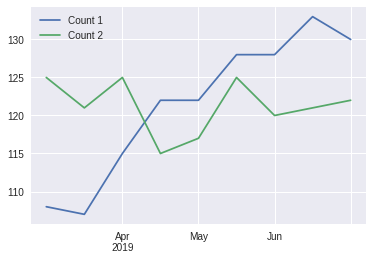

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()

## Merge Data


1.   outer
2.   inner
3.   right
4.   left


In [3]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
print(staff_df.head())
print()
print(student_df.head())

                 Role
Name                 
Kelly  Director of HR
Sally  Course liasion
James          Grader

            School
Name              
James     Business
Mike           Law
Sally  Engineering


In [4]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


In [5]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


In [6]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [7]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


## Selecionar un conjunto de columnas: sumar, promediar por filas

In [0]:
import numpy as np
student_df["grades"] = np.random.randint(0, 100, len(student_df))
student_df["grades.1"] = np.random.randint(0, 100, len(student_df))
student_df["grades.2"] = np.random.randint(0, 100, len(student_df))

In [17]:
student_df

,School,grades,grades.1,grades.2
Name,,,,
James,Business,67,51,90
Mike,Law,88,1,44
Sally,Engineering,49,57,17


In [19]:
student_df["mean grades"] = student_df[["grades", "grades.1", "grades.2"]].mean(axis=1)
student_df

,School,grades,grades.1,grades.2,average grades,mean grades
Name,,,,,,
James,Business,67,51,90,69.333333,69.333333
Mike,Law,88,1,44,44.333333,44.333333
Sally,Engineering,49,57,17,41.000000,41.000000


## Query

In [22]:
student_df.query("grades in [67,49]")

,School,grades,grades.1,grades.2,average grades,mean grades
Name,,,,,,
James,Business,67,51,90,69.333333,69.333333
Sally,Engineering,49,57,17,41.000000,41.000000


In [25]:
student_df[student_df["School"].str.startswith("L")]

,School,grades,grades.1,grades.2,average grades,mean grades
Name,,,,,,
Mike,Law,88,1,44,44.333333,44.333333


## Ordenar por columna

In [26]:
student_df.sort_values(by="grades", ascending=False)

,School,grades,grades.1,grades.2,average grades,mean grades
Name,,,,,,
Mike,Law,88,1,44,44.333333,44.333333
James,Business,67,51,90,69.333333,69.333333
Sally,Engineering,49,57,17,41.000000,41.000000


## Cambiar de índice

In [29]:
student_df.set_index("grades")

,School,grades.1,grades.2,average grades,mean grades
grades,,,,,
67,Business,51,90,69.333333,69.333333
88,Law,1,44,44.333333,44.333333
49,Engineering,57,17,41.000000,41.000000
